In [219]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import pandas as pd

import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

import datetime
import time
import dateutil

In [5]:
# Manually parse the file, since the format is ugly
example = '''
Mon Oct 22 13:39:00 PDT 2018
    | |           "DesignCycleCount70" = 0
    | |           "CycleCount" = 212
    | |           "DesignCycleCount9C" = 1000
    | |           "MaxCapacity" = 3939
    | |           "CurrentCapacity" = 3160
    | |           "LegacyBatteryInfo" = {"Amperage"=1457,"Flags"=7,"Capacity"=3939,"Current"=3160,"Voltage"=12735,"Cycle Count"=212}
    | |           "DesignCapacity" = 4315
'''
# so we want to:
# 1) parse the date (any line w/o the | |)
# 2) grab values after DesignCapacity, MaxCapacity, CurrentCapacity


In [48]:
# I worked on this previously:
# https://github.com/jradavenport/dst4l_2015/
# let's clean it up some...

def bat_parse(file):
    d = open(file, 'r')

    date = [] # this will be the list of dates
    dateraw = []
    chrg = []
    capac = []
    maxcap = []
    while True:
        # read in each line
        theline = d.readline().strip()
        if (len(theline) == 0):
            break

        # lines that have a date in them (don't start w/ '    |')
        if (theline[0] != '|'):
            x = dateutil.parser.parse(theline).timetuple()
            dateraw.append(theline)
            date.append(time.mktime(x)/60./60./24.)

        if theline[0] == '|':
            sep = theline.split("\"")
            if sep[1][0:6].lower() == 'maxcap':
                capac.append(float(sep[2].split(' ')[2]))
            if sep[1][0:10].lower() == 'currentcap':
                chrg.append(float(sep[2].split(' ')[2]))
            if sep[1][0:10].lower() == 'designcapa':
                maxcap.append(float(sep[2].split(' ')[2]))

    d.close()
    
    return date, dateraw, chrg, capac, maxcap

In [63]:
file = '../old_data/batlog_fuji.dat'
date, dateraw, chrg, capac, maxcap = bat_parse(file)

# convert these lists into numpy arrays for easier manipulating
charge0 = np.array(chrg, dtype='float')
capacity0 = np.array(capac, dtype='float')
day0 = np.array(date, dtype='float')
timeofday0 = ((day0-7/24.) % 1)*24
mcap0 = np.array(maxcap, dtype='float')


/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname MDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


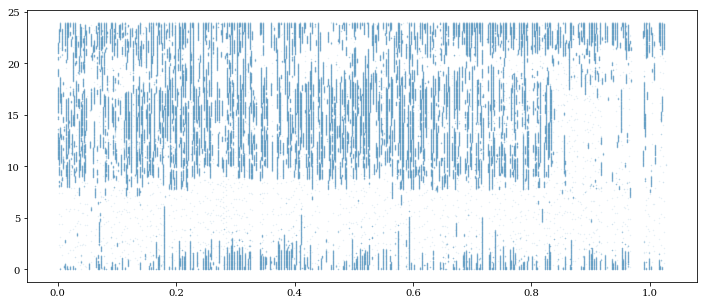

In [66]:
plt.figure(figsize=(12,5))
plt.scatter((day0 - day0.min())/365., timeofday0, marker='.', s=1, alpha=0.1)

In [65]:
file = '../old_data/batlog_braeburn.dat'
date, dateraw, chrg, capac, maxcap = bat_parse(file)

# convert these lists into numpy arrays for easier manipulating
charge1 = np.array(chrg, dtype='float')
capacity1 = np.array(capac, dtype='float')
day1 = np.array(date, dtype='float')
timeofday1 = ((day1-7/24.) % 1)*24
mcap1 = np.array(maxcap, dtype='float')


/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname MST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname MDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1204: UnknownTim

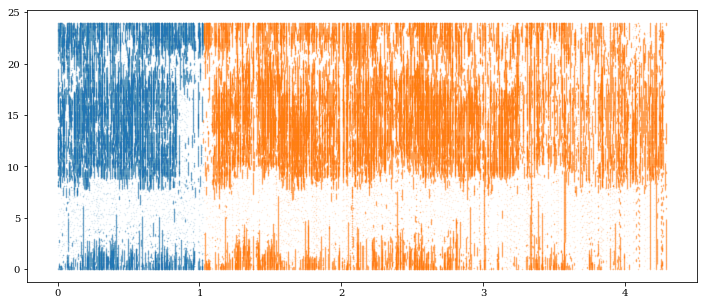

In [67]:
plt.figure(figsize=(12,5))
plt.scatter((day0 - day0.min())/365., timeofday0, marker='.', s=1, alpha=0.1)
plt.scatter((day1 - day0.min())/365., timeofday1, marker='.', s=1, alpha=0.1)

In [69]:
# this is the LIVE version on this computer
file = '/Users/james/batlog.dat'
date, dateraw, chrg, capac, maxcap = bat_parse(file)

# convert these lists into numpy arrays for easier manipulating
charge2 = np.array(chrg, dtype='float')
capacity2 = np.array(capac, dtype='float')
day2 = np.array(date, dtype='float')
timeofday2 = ((day2-7/24.) % 1)*24
mcap2 = np.array(maxcap, dtype='float')



/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1204: UnknownTim

In [113]:
day0[1]

15566.738194444444

# Six Years of Data

Text(0,0.5,'Time of Day')

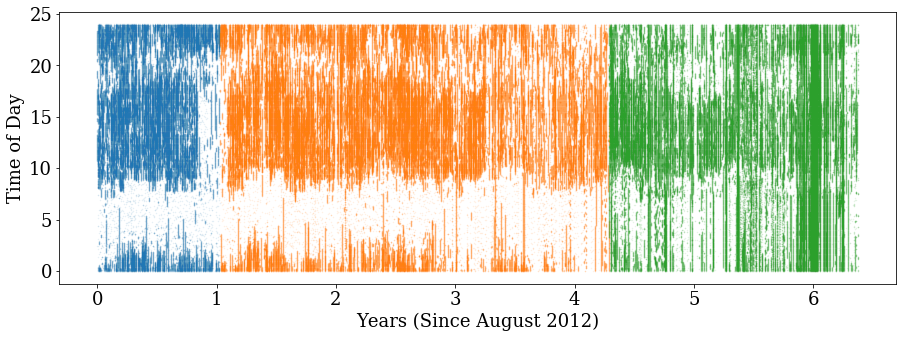

In [115]:
plt.figure(figsize=(15,5))
plt.scatter((day0 - day0.min())/365., timeofday0, marker='.', s=1, alpha=0.1)
plt.scatter((day1 - day0.min())/365., timeofday1, marker='.', s=1, alpha=0.1)
plt.scatter((day2 - day0.min())/365., timeofday2, marker='.', s=1, alpha=0.1)

plt.xlabel('Years (Since August 2012)')
plt.ylabel('Time of Day')

## Anomalies in the 2016MBP

(17700, 17800)

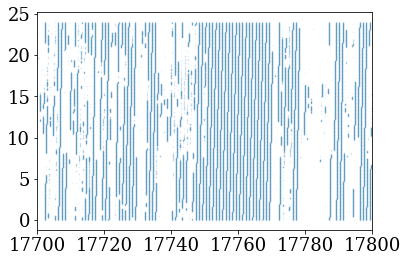

In [80]:
plt.scatter(day2, timeofday2, marker='.', s=1, alpha=0.1)

# plt.xlim(5.8,6.3)
plt.xlim(17700,17760)

Text(0,0.5,'Time of Day')

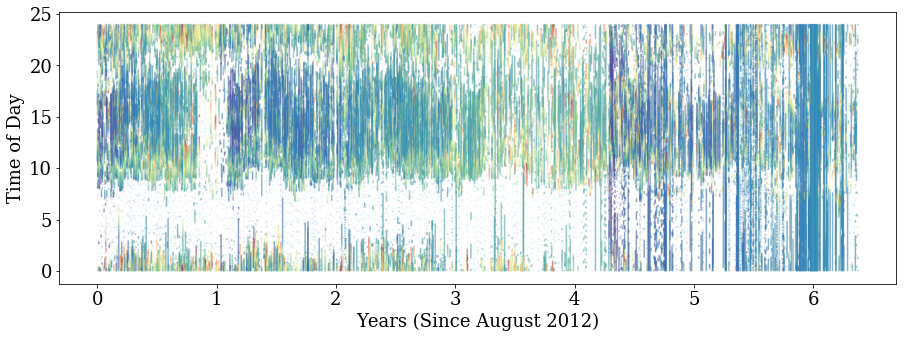

In [135]:
plt.figure(figsize=(15,5))
plt.scatter((day0[0:mcap0.size] - day0.min())/365., timeofday0[0:mcap0.size], marker='.', s=1, alpha=0.1, 
            c=charge0[0:mcap0.size], cmap=plt.cm.Spectral)
plt.scatter((day1[0:mcap1.size] - day0.min())/365., timeofday1[0:mcap1.size], marker='.', s=1, alpha=0.1,
            c=charge1[0:mcap1.size], cmap=plt.cm.Spectral)
plt.scatter((day2[0:mcap2.size] - day0.min())/365., timeofday2[0:mcap2.size], marker='.', s=1, alpha=0.1, 
            c=charge2[0:mcap2.size], cmap=plt.cm.Spectral)

plt.xlabel('Years (Since August 2012)')
plt.ylabel('Time of Day')

# Battery Decay Over Time

Text(0.5,0,'Years of Use')

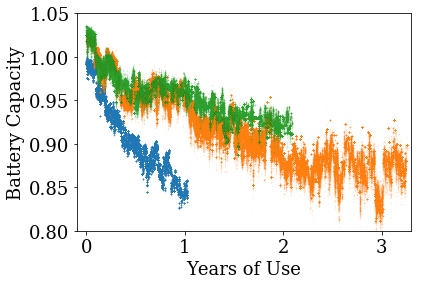

In [139]:

plt.scatter((day0[0:mcap0.size] - day0[1])/365., capacity0[0:mcap0.size]/mcap0, marker='.', s=1, alpha=0.1)
plt.scatter((day1[0:mcap1.size] - day1[1])/365., capacity1/mcap1, marker='.', s=1, alpha=0.1)
plt.scatter((day2[0:mcap2.size] - day2[1])/365., capacity2/mcap2, marker='.', s=1, alpha=0.1)
plt.xlim(-0.1, 3.3)
plt.ylim(0.8,1.05)
plt.ylabel('Battery Capacity')
plt.xlabel('Years of Use')

# An Interesting Jog at T+0.1yrs?
Is there something physical happening to the battery at this point?

Text(0.5,0,'Years of Use')

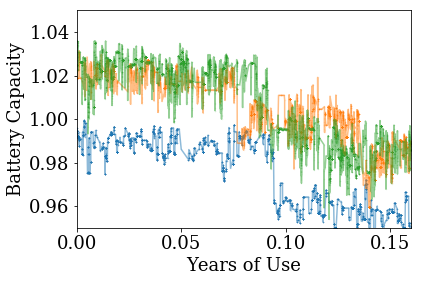

In [140]:

plt.plot((day0[0:mcap0.size] - day0[1])/365., capacity0[0:mcap0.size]/mcap0, alpha=0.5)
plt.scatter((day0[0:mcap0.size] - day0[1])/365., capacity0[0:mcap0.size]/mcap0, marker='.', s=1, alpha=0.1)

plt.plot((day1[0:mcap1.size] - day1[1])/365., capacity1/mcap1, alpha=0.5)
plt.scatter((day1[0:mcap1.size] - day1[1])/365., capacity1/mcap1, marker='.', s=1, alpha=0.1)

plt.plot((day2[0:30000] - day2[1])/365., capacity2[0:30000]/mcap2[0:30000], alpha=0.5)
plt.scatter((day2[0:30000] - day2[1])/365., capacity2[0:30000]/mcap2[0:30000], marker='.', s=1, alpha=0.1)


plt.xlim(0, 0.16)
plt.ylim(0.95,1.05)

plt.ylabel('Battery Capacity')
plt.xlabel('Years of Use')

Text(0.5,0,'# Data Points')

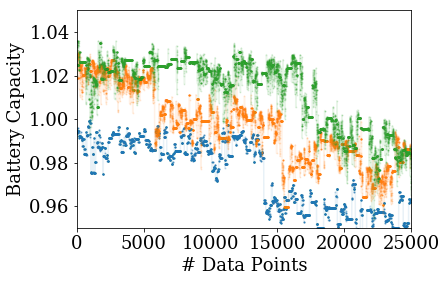

In [211]:
plt.plot(capacity0[0:mcap0.size]/mcap0,'-o', alpha=0.1,  markersize=1)
plt.plot(capacity1/mcap1, '-o',  alpha=0.1,markersize=1)
plt.plot(capacity2/mcap2, '-o',  alpha=0.1,markersize=1)
plt.xlim(0,25000)
plt.ylim(0.95,1.05)
plt.ylabel('Battery Capacity')
plt.xlabel('# Data Points')

# Discharge over Time

Text(0.5,0,'Years of Use')

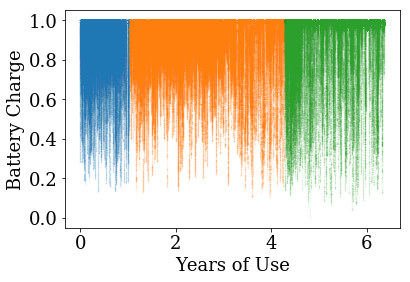

In [177]:

plt.scatter((day0[0:mcap0.size] - day0[1])/365., charge0[0:mcap0.size]/capacity0[0:mcap0.size], 
            marker='.', s=1, alpha=0.1)
plt.scatter((day1[0:mcap1.size] - day0[1])/365., charge1/capacity1, marker='.', s=1, alpha=0.1)
plt.scatter((day2[0:mcap2.size] - day0[1])/365., charge2/capacity2, marker='.', s=1, alpha=0.1)
plt.ylabel('Battery Charge')
plt.xlabel('Years of Use')

Text(0.5,0,'Years of Use')

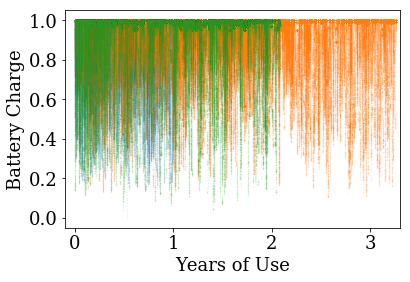

In [178]:

plt.scatter((day0[0:mcap0.size] - day0[1])/365., charge0[0:mcap0.size]/capacity0[0:mcap0.size], 
            marker='.', s=1, alpha=0.1)
plt.scatter((day1[0:mcap1.size] - day1[1])/365., charge1/capacity1, marker='.', s=1, alpha=0.1)
plt.scatter((day2[0:mcap2.size] - day2[1])/365., charge2/capacity2, marker='.', s=1, alpha=0.1)

plt.xlim(-0.1, 3.3)
plt.ylabel('Battery Charge')
plt.xlabel('Years of Use')

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(1, 300.0)

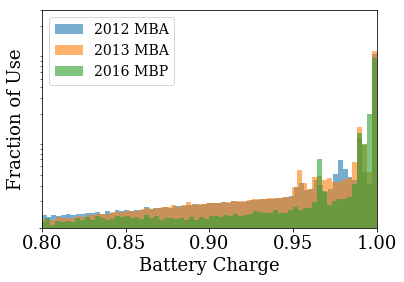

In [198]:
_ = plt.hist(charge0/capacity0, bins=300, alpha=0.6, normed=True, label='2012 MBA')
_ = plt.hist(charge1/capacity1, bins=300, alpha=0.6, normed=True, label='2013 MBA')
_ = plt.hist(charge2[0:50000]/capacity2[0:50000], bins=300, alpha=0.6, normed=True, label='2016 MBP')
plt.xlabel('Battery Charge')
plt.ylabel('Fraction of Use')
plt.yscale('log')
plt.yticks([1],[' '])
plt.legend(fontsize=14, loc=2)
plt.xlim(0.8,1)
plt.ylim(1,3e2)

# Predicting Discharge Rate?
This is a feature Apple removed a couple years ago, which mildly annoys me. So, given this much history of charge/discharge, can we learn the discharge profile and predict time to empty?

(13.125, 13.24)

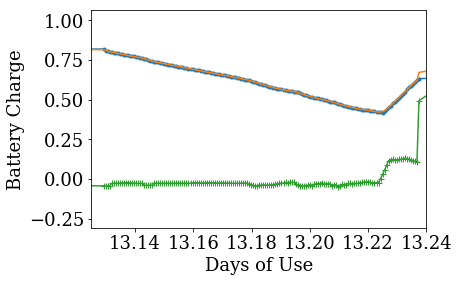

In [229]:
plt.plot((day2[0:10000] - day2[1]), charge2[0:10000]/capacity2[0:10000], '-o', markersize=3)

smo = pd.Series(charge2[0:10000]/capacity2[0:10000]).rolling(window=5, center=True).mean()

plt.plot((day2[0:10000] - day2[1]),smo)
plt.plot((day2[0:10000] - day2[1]), smo.diff(periods=1)*10, '-+')

plt.ylabel('Battery Charge')
plt.xlabel('Days of Use')

plt.xlim(13.125,13.24)

In [224]:
smo.diff()

0            NaN
1            NaN
2            NaN
3      -0.005716
4      -0.005600
5      -0.003786
6      -0.004449
7      -0.003097
8      -0.004364
9      -0.002840
10     -0.003081
11     -0.002445
12     -0.004144
13      0.039607
14      0.082703
15      0.080542
16      0.080519
17      0.080811
18      0.037825
19     -0.004884
20     -0.003409
21     -0.003181
22     -0.003029
23     -0.002499
24     -0.002359
25     -0.002869
26     -0.002192
27     -0.000831
28     -0.001884
29     -0.002054
          ...   
9970    0.000000
9971    0.000000
9972    0.000000
9973    0.000000
9974    0.000000
9975    0.000000
9976    0.000000
9977    0.000000
9978    0.000000
9979    0.000000
9980    0.000000
9981    0.000000
9982    0.000000
9983    0.000000
9984    0.000000
9985    0.000000
9986    0.000000
9987    0.000000
9988    0.000000
9989    0.000000
9990    0.000000
9991    0.000000
9992    0.000000
9993    0.000000
9994    0.000000
9995    0.000000
9996    0.000000
9997    0.0000